<a href="https://colab.research.google.com/github/Anan-2003/Portfolio_Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install --upgrade pandas-datareader

In [ ]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np



In [ ]:
style.use('ggplot')

tickers= ['HDFCBANK.NS','INFY.NS','BERGEPAINT.NS','CIPLA.NS','JETAIRWAYS.NS']
start=dt.datetime(2012,1,1)
end=dt.datetime(2022,1,1)
number_of_portfolios=25000
RF=0

In [ ]:
returns=pd.DataFrame()
for ticker in tickers:
  data=web.DataReader(ticker,'yahoo',start,end)
  data=pd.DataFrame(data)
  data[ticker]=data['Adj Close'].pct_change()

  if returns.empty:
    returns=data[[ticker]]
  else:
    returns=returns.join(data[[ticker]],how='outer')

In [ ]:
returns = returns.drop(returns.index[0], axis=0)
returns

,HDFCBANK.NS,INFY.NS,BERGEPAINT.NS,CIPLA.NS,JETAIRWAYS.NS
Date,,,,,
2012-01-03,0.028816,0.019705,0.019231,0.022447,0.025752
2012-01-04,0.009450,-0.003457,0.016009,0.008843,-0.010719
2012-01-05,0.000790,-0.004992,-0.008441,0.012543,0.001711
2012-01-06,0.021751,-0.002817,0.017026,0.010298,0.002562
2012-01-09,0.005294,0.001553,0.011161,0.018319,0.053095
...,...,...,...,...,...
2021-12-27,0.008270,0.001422,0.007221,0.024166,-0.006197
2021-12-28,0.006893,0.011709,0.008509,0.003279,0.010204
2021-12-29,-0.004758,-0.001298,-0.000531,0.002411,-0.007856


In [ ]:
portfolio_returns=[]
portfolio_risks=[]
sharpe_ratios=[]
portfolio_weights=[]
for portfolio in range(number_of_portfolios):
      weights=np.random.random_sample(len(tickers))
      weights=np.round(weights/np.sum(weights),5)
      portfolio_weights.append(weights)
      annualized_return=np.sum(returns.mean()*weights)*252
      matrix_covariance=returns.cov()*252
      portfolio_variance=np.dot(weights.T,np.dot(matrix_covariance,weights))
      portfolio_standard_deviation=np.sqrt(portfolio_variance)
      portfolio_risks.append(portfolio_standard_deviation)
      portfolio_returns.append(annualized_return)
      
      #Calculating Sharpe Ratio
      sharpe_ratio=(annualized_return-RF)/portfolio_standard_deviation
      sharpe_ratios.append(sharpe_ratio)

portfolio_returns=np.array(portfolio_returns)
portfolio_risks=np.array(portfolio_risks)
sharpe_ratios=np.array(sharpe_ratios)

# print(portfolio_risks)
# print(portfolio_returns)
    

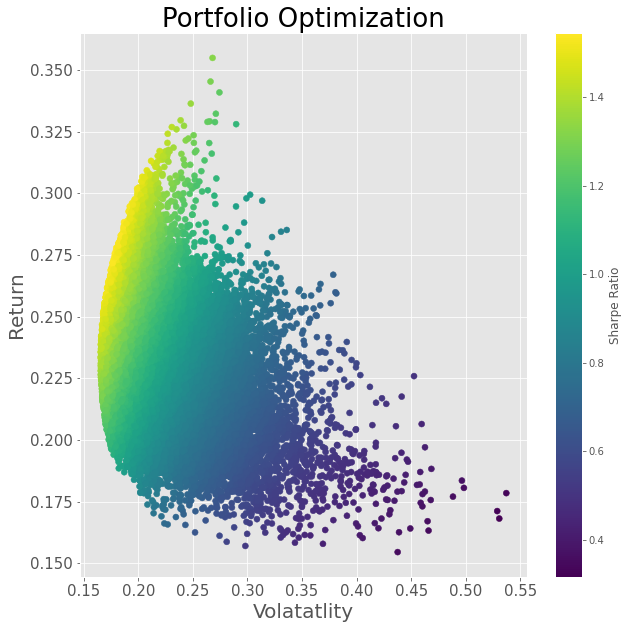

In [ ]:
plt.figure(figsize=(10,10))
# print(portfolio_risks.shape, portfolio_returns.shape)
plt.scatter(portfolio_risks,portfolio_returns, c=portfolio_returns/portfolio_risks)
plt.title('Portfolio Optimization',fontsize=26)
plt.xlabel('Volatatlity',fontsize=20)
plt.ylabel('Return',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar(label='Sharpe Ratio')
plt.style.use('dark_background')
plt.show()